In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualisasi
import seaborn as sns #Visualisasi

from sklearn.impute import KNNImputer #Imputasi
from sklearn.preprocessing import StandardScaler #Scalling
from imblearn.over_sampling import SMOTE #Over Sampling
from wordcloud import WordCloud #Visualisasi Kata

In [11]:
df = pd.read_csv("diabetes.csv")
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               691 non-null    float64
 1   Glucose                   653 non-null    float64
 2   BloodPressure             614 non-null    float64
 3   SkinThickness             730 non-null    float64
 4   Insulin                   576 non-null    float64
 5   BMI                       538 non-null    float64
 6   DiabetesPedigreeFunction  691 non-null    float64
 7   Age                       614 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [13]:
df.isnull().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [14]:
(df.isnull().sum()/len(df))*100

,0
Pregnancies,10.026042
Glucose,14.973958
BloodPressure,20.052083
SkinThickness,4.947917
Insulin,25.000000
BMI,29.947917
DiabetesPedigreeFunction,10.026042
Age,20.052083
Outcome,0.000000


In [16]:
import pandas as pd

def count_outliers_iqr(data):
    # Hitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    # Hitung IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Hitung batas bawah dan batas atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return boolean series untuk mendeteksi outlier
    return ((data < lower_bound) | (data > upper_bound))

# Inisialisasi dictionary untuk menyimpan jumlah outlier
outlier_counts = {}

# Iterasi kolom dengan tipe data numerik ('int64', 'float64')
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    # Hitung jumlah outlier untuk setiap kolom
    outlier_counts[col] = count_outliers_iqr(df[col]).sum()

# Konversi hasilnya menjadi DataFrame untuk tampilan yang lebih mudah
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['column', 'outlier_count'])

# Menampilkan DataFrame outlier
print(outlier_counts_df)


                     column  outlier_count
0               Pregnancies              4
1                   Glucose              4
2             BloodPressure             39
3             SkinThickness              1
4                   Insulin             26
5                       BMI             14
6  DiabetesPedigreeFunction             23
7                       Age             16
8                   Outcome              0


In [19]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # Kuartil pertama
    Q3 = data.quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    return ((data < lower_bound) | (data > upper_bound)).sum()  # Menghitung jumlah outlier

# Misalkan df adalah DataFrame yang berisi data Anda
df = pd.read_csv('diabetes.csv')  # Mengganti dengan nama file Anda

outlier_counts = {}
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    outlier_counts[column] = count_outliers_iqr(df[column])  # Menggunakan df[column] untuk kolom yang tepat

# Mengonversi hasil ke dalam DataFrame
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

# Menampilkan hasil
print(outlier_counts_df)


                     Column  Outlier Count
0               Pregnancies              4
1                   Glucose              4
2             BloodPressure             39
3             SkinThickness              1
4                   Insulin             26
5                       BMI             14
6  DiabetesPedigreeFunction             23
7                       Age             16
8                   Outcome              0


In [20]:
df['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


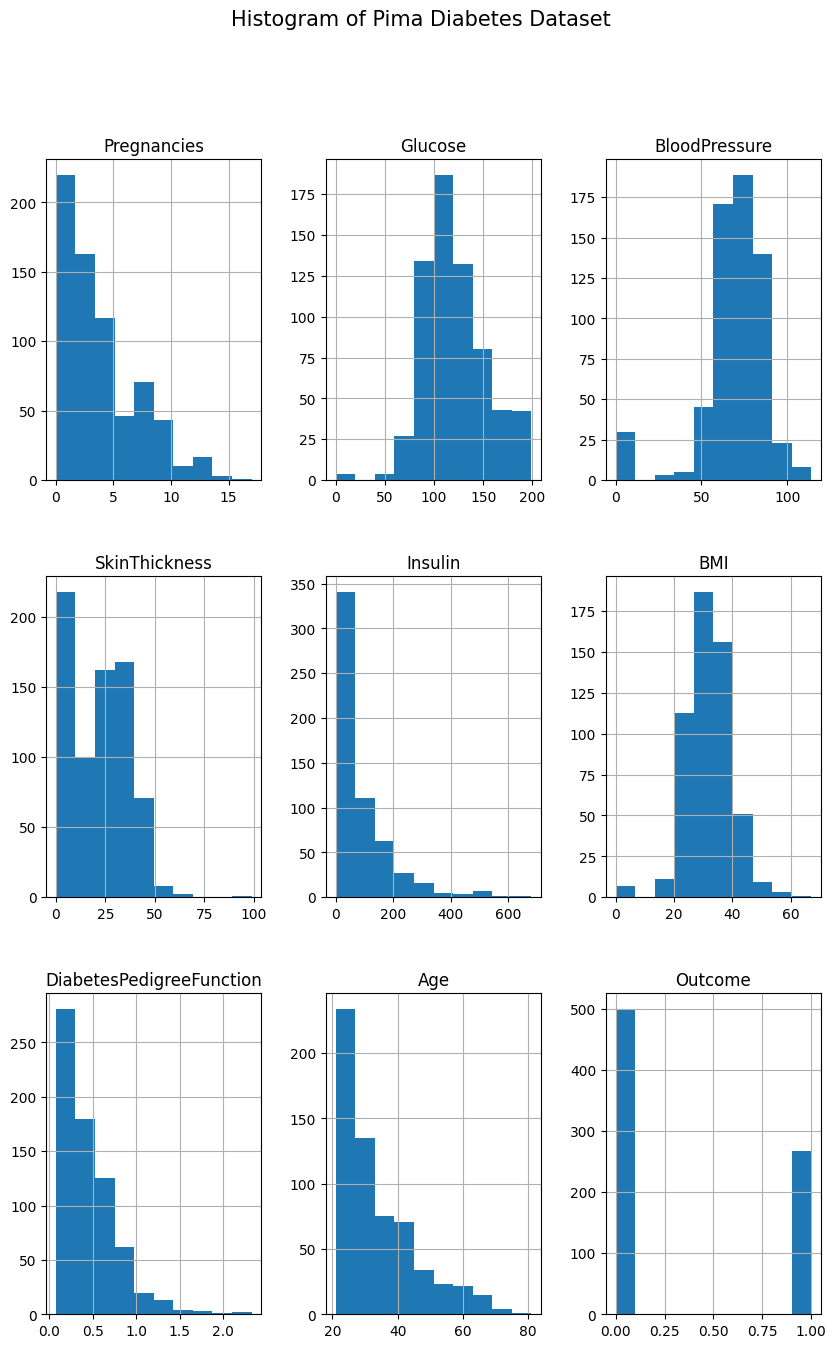

In [21]:
import matplotlib.pyplot as plt

def plot_histogram(data):
    # Membuat histogram dengan 10 bin, ukuran 10x15, dan layout 3x3
    data.hist(bins=10, figsize=(10, 15), layout=(3, 3))

    # Menambahkan judul utama untuk seluruh histogram
    plt.suptitle('Histogram of Pima Diabetes Dataset', fontsize=15)

    # Menampilkan plot
    plt.show()

# Panggil fungsi plot_histogram untuk DataFrame df
plot_histogram(df)


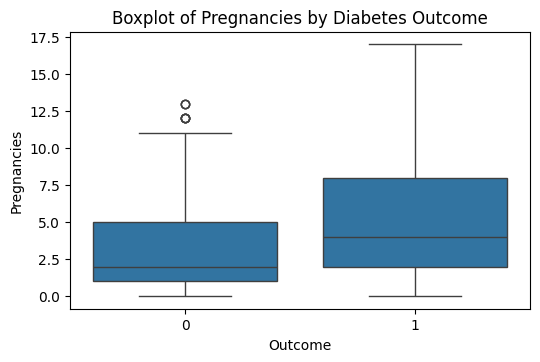

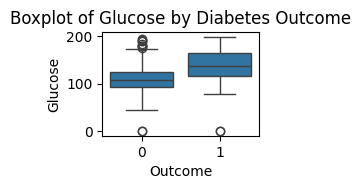

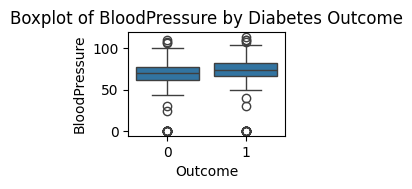

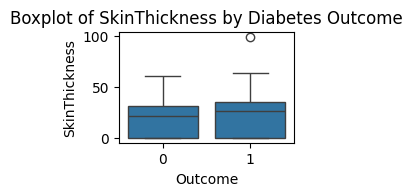

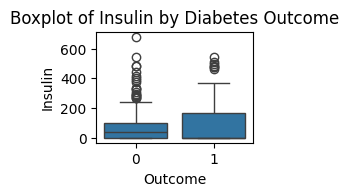

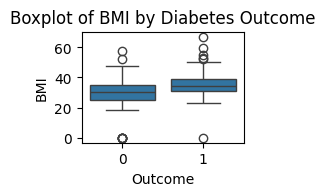

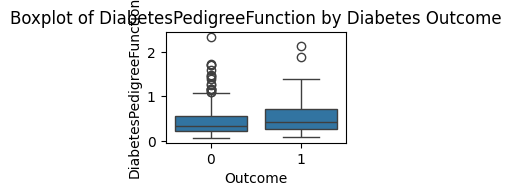

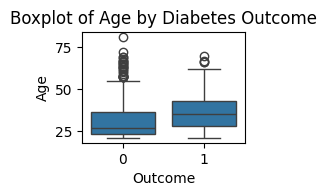

In [22]:
def box_plot(data):
  plt.figure(figsize = (15,10))
  for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'Outcome', y = column, data = data)
    plt.title(f"Boxplot of {column} by Diabetes Outcome")
    plt.tight_layout()
    plt.show()

box_plot(df)

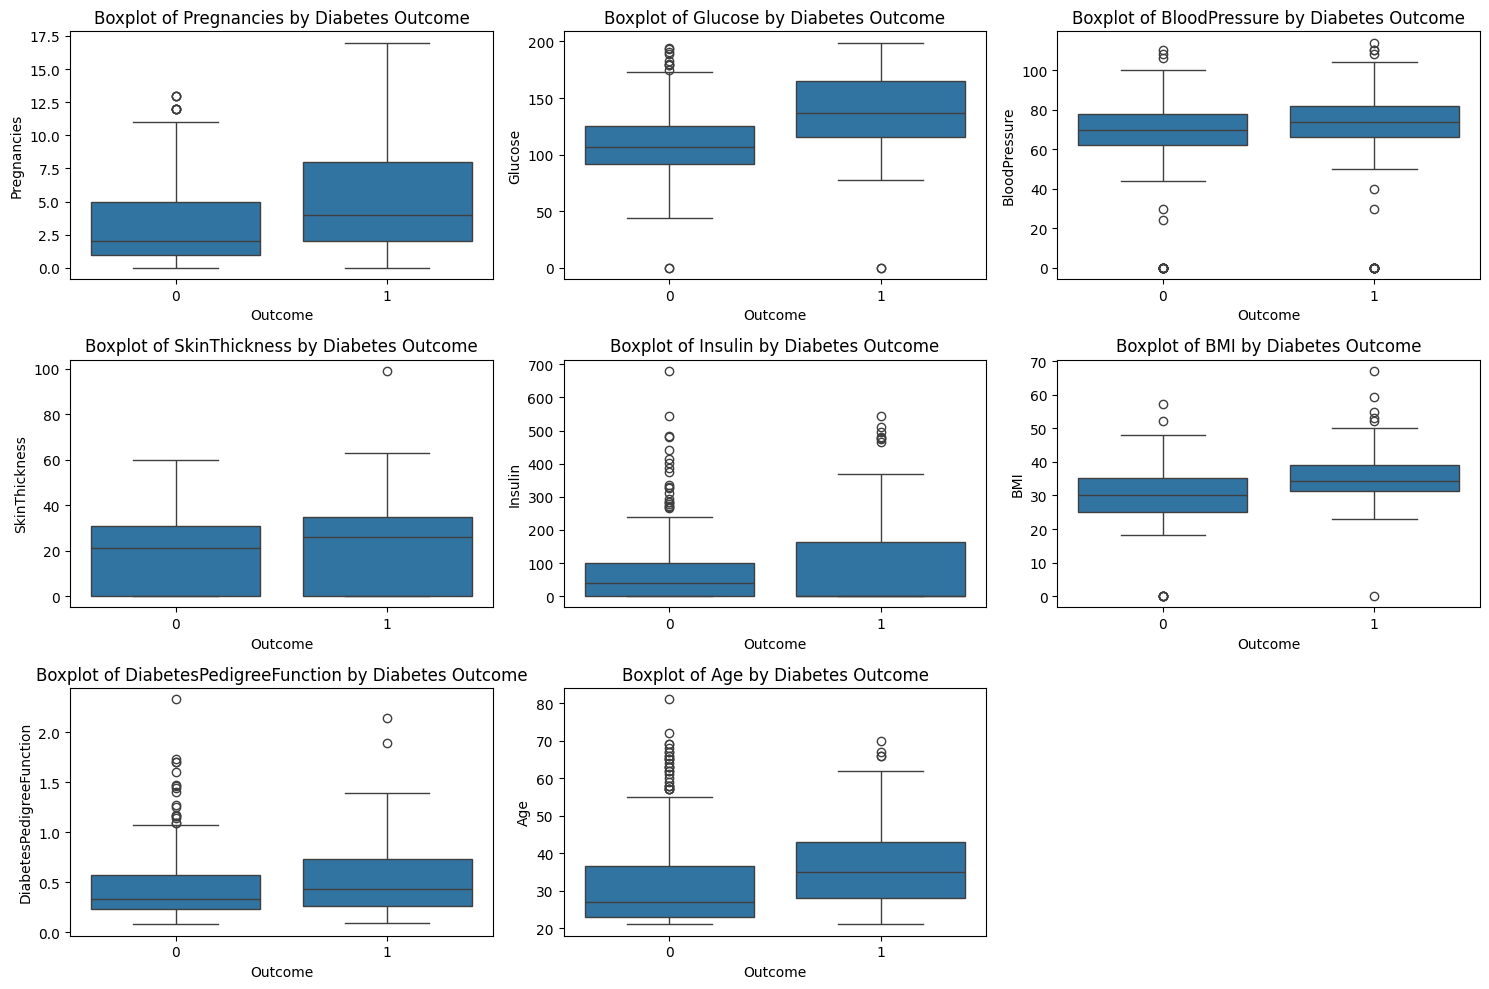

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
    plt.figure(figsize=(15, 10))  # Menentukan ukuran figure
    for i, column in enumerate(data.columns[:-1]):  # Mengiterasi kolom kecuali kolom terakhir
        plt.subplot(3, 3, i + 1)  # Membuat subplot
        sns.boxplot(x='Outcome', y=column, data=data)  # Membuat boxplot
        plt.title(f"Boxplot of {column} by Diabetes Outcome")  # Judul setiap subplot

    plt.tight_layout()  # Menyesuaikan layout agar tidak tumpang tindih
    plt.show()  # Menampilkan plot

# Panggil fungsi box_plot untuk DataFrame df
box_plot(df)


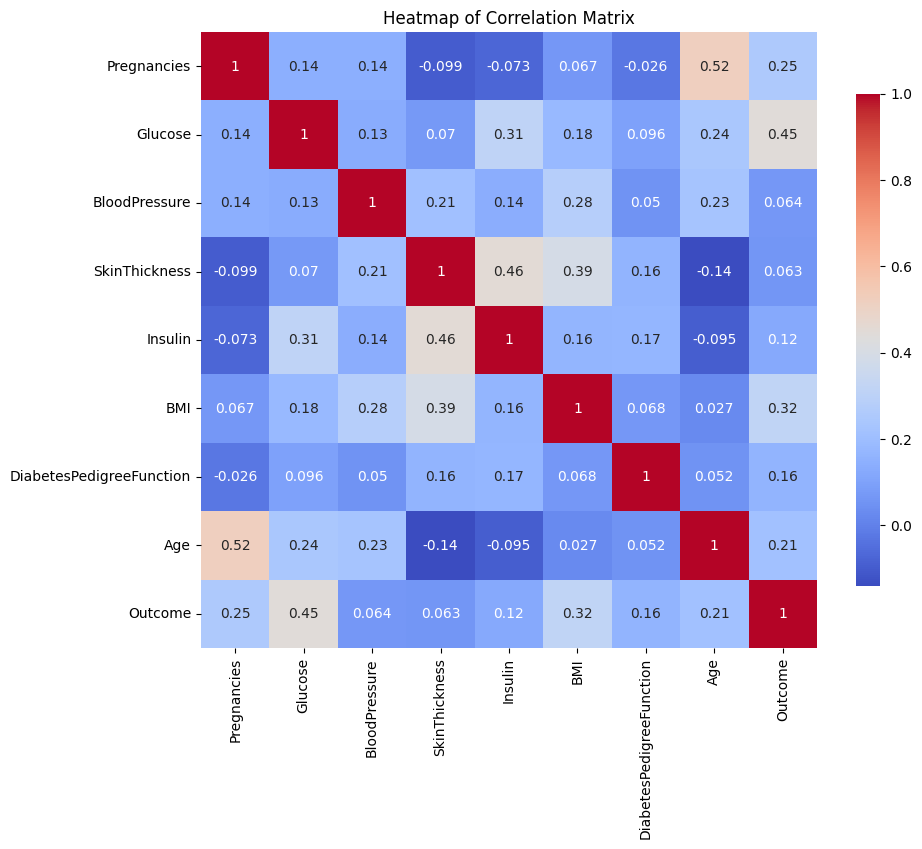

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari matriks korelasi DataFrame df
plt.figure(figsize=(10, 8))  # Mengatur ukuran figure
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})

# Menambahkan judul
plt.title('Heatmap of Correlation Matrix')
plt.show()  # Menampilkan plot


In [28]:
df_text = pd.read_excel('foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


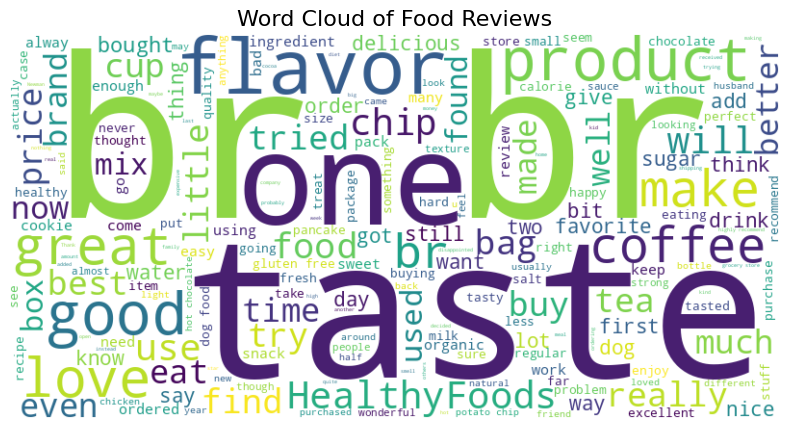

In [29]:
text = " ".join(review for review in df_text.Text)

def plot_wordcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('Word Cloud of Food Reviews', fontsize=16)
  plt.show()

plot_wordcloud(text)

In [31]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [32]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [33]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [34]:
smote = SMOTE(random_state=42)
X = df.drop('Outcome', axis=1)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

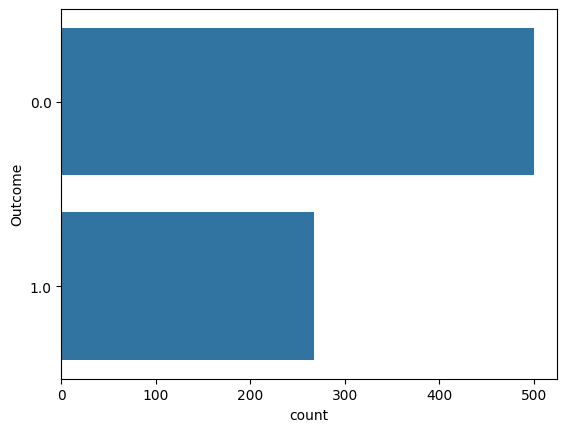

In [35]:
sns.countplot(data=df, y=y)

<Axes: xlabel='count', ylabel='Outcome'>

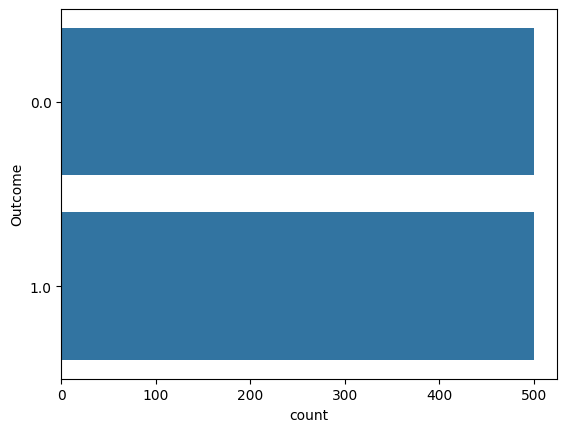

In [36]:
sns.countplot(data=x_resampled, y=y_resampled)